In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
<a name = Section4></a>
# **Introduction and Data Description**
---

Task 2

Video games sales (see attached) dataset contains sales data for video games from all around the world, across different platforms, genres and regions. Armed with this data and analysis, future developers can better understand what types of gameplay and mechanics resonate more with players to create a new gaming experience. Undertake a comprehensive analysis to produce a report on



Insights on what games successful (hit) across the globe
What other things can we learn from this dataset


Submit your code and report via Github repo

---
<a name = Section3></a>
# **Installing & Importing Libraries**
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.graph_objs as go
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<a name = Section4></a>
# **Data Loading**
---



In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Kovai.co/Data/Video Games Sales.csv')

In [4]:
df_train.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [5]:
df_train.tail()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00
1906,1906,1907,WWE SmackDown vs. Raw 2011,X360,2010.0,Fighting,THQ,0.42,0.32,0.00,0.09,0.83,82.00



---
<a name = Section4></a>
# **4. Data Information**
---


In [6]:
df_train.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 642.1 KB


<a name = Section51> </a>
# **6. Checking for Missing Data**

In [7]:
def plot_missing_value(dataframe, title):
    total_missing = dataframe.isnull().sum().sum()
    total_values = dataframe.size
    missing_percentage = (total_missing / total_values) * 100

    labels = ['Missing', 'Available']
    sizes = [missing_percentage, 100 - missing_percentage]
    colors = ['red', 'green']

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage of Missing Values - {title}')
    plt.legend(title='Data Availability', labels=labels, loc='upper right')
    plt.axis('equal')
    plt.show()

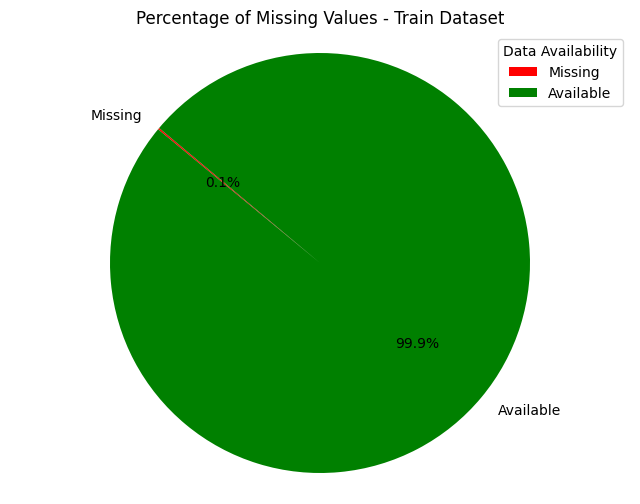

In [8]:
plot_missing_value(df_train, "Train Dataset")

In [9]:
df_train.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

<a name = Section51> </a>
# **Basic Statistical Analysis**

In [10]:
df_train.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


<a name = Section51> </a>
# **Finding duplicate rows**

In [11]:
duplicate_rows_df = df_train[df_train.duplicated()]
print("Number of duplicate rows in Training set: ", duplicate_rows_df.shape)

Number of duplicate rows in Training set:  (0, 13)


**Observations:**

- No duplicate data

<a name = Section51> </a>
# **Video Game Releases by Year**

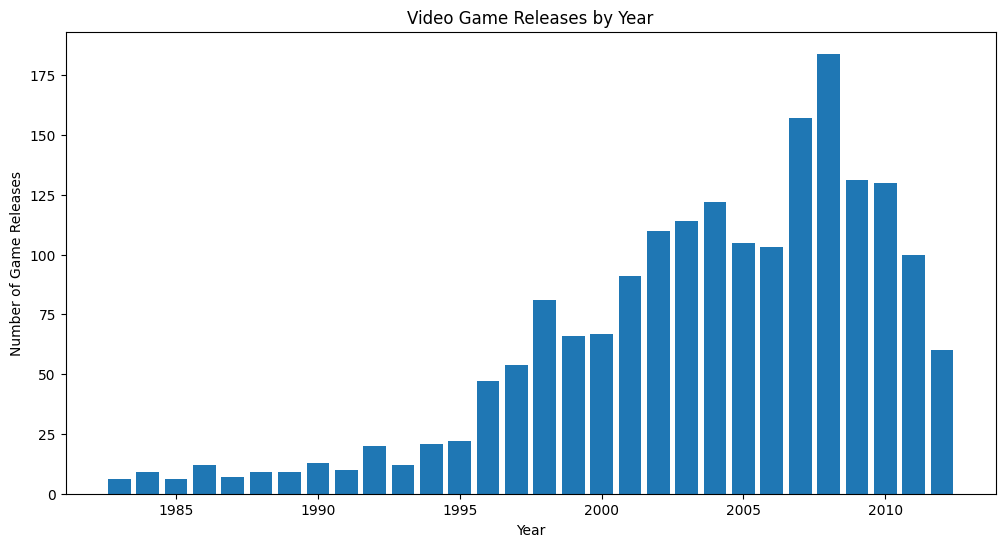

In [12]:
year_counts = df_train.groupby('Year')['Game Title'].count()
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Game Releases')
plt.title('Video Game Releases by Year')
plt.show()


<a name = Section51> </a>
# **Video Game Revenue by Year**

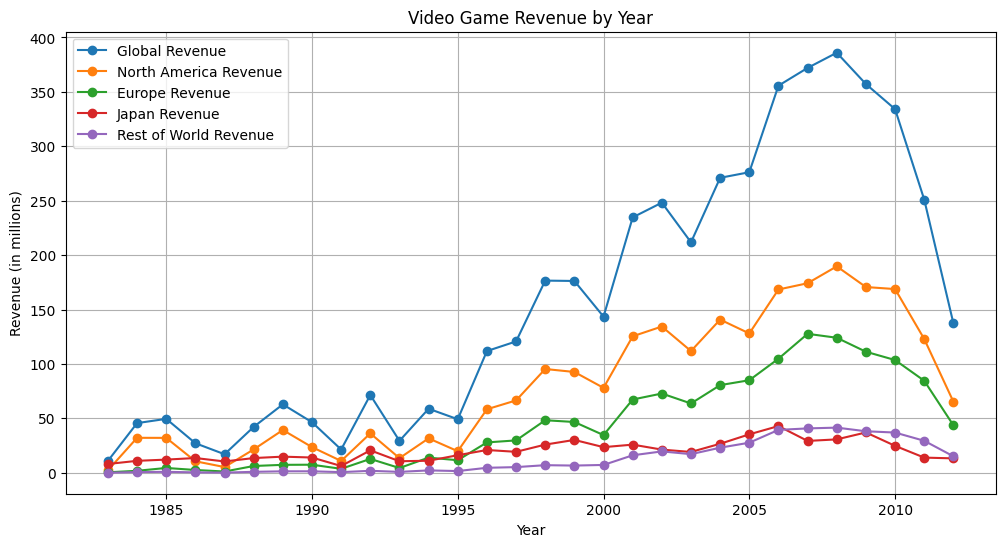

In [13]:

revenue_by_year = df_train.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].sum()
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_year.index, revenue_by_year['Global'], marker='o', label='Global Revenue')
plt.plot(revenue_by_year.index, revenue_by_year['North America'], marker='o', label='North America Revenue')
plt.plot(revenue_by_year.index, revenue_by_year['Europe'], marker='o', label='Europe Revenue')
plt.plot(revenue_by_year.index, revenue_by_year['Japan'], marker='o', label='Japan Revenue')
plt.plot(revenue_by_year.index, revenue_by_year['Rest of World'], marker='o', label='Rest of World Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.title('Video Game Revenue by Year')
plt.grid(True)
plt.legend()
plt.show()


<a name = Section51> </a>
# **Top Publishers by Global Revenue**

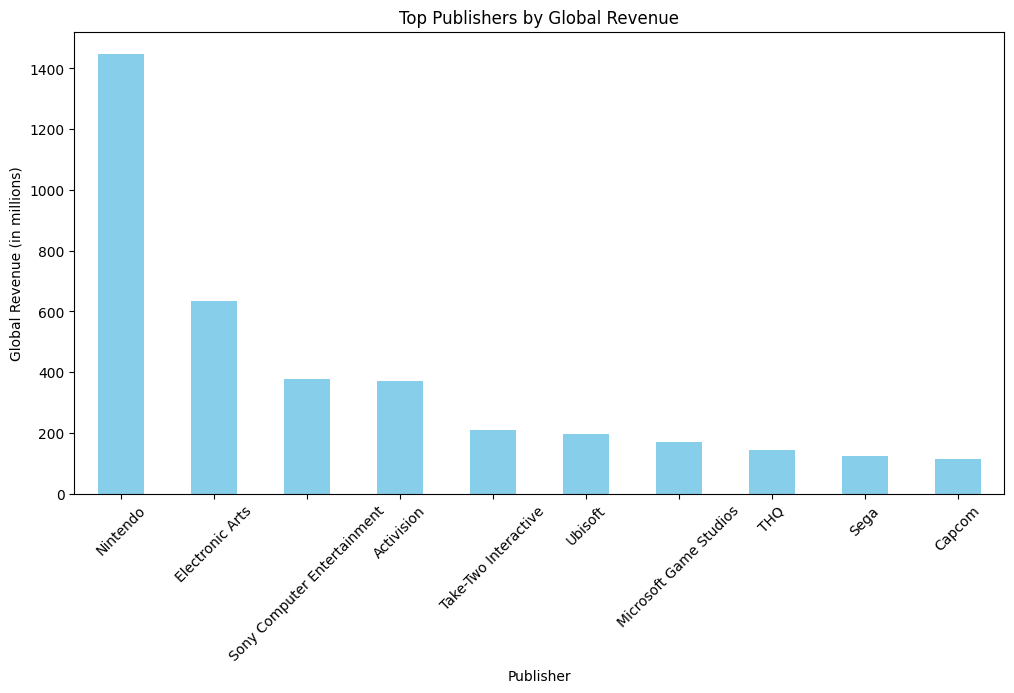

In [15]:
publisher_revenue = df_train.groupby('Publisher')['Global'].sum()
top_publishers = publisher_revenue.sort_values(ascending=False).head(10)  # Displaying the top 10 publishers
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Global Revenue (in millions)')
plt.title('Top Publishers by Global Revenue')
plt.xticks(rotation=45)  # Rotates the publisher names on the x-axis for better readability
plt.show()

<a name = Section51> </a>
# **Video Game Sales by Genre**

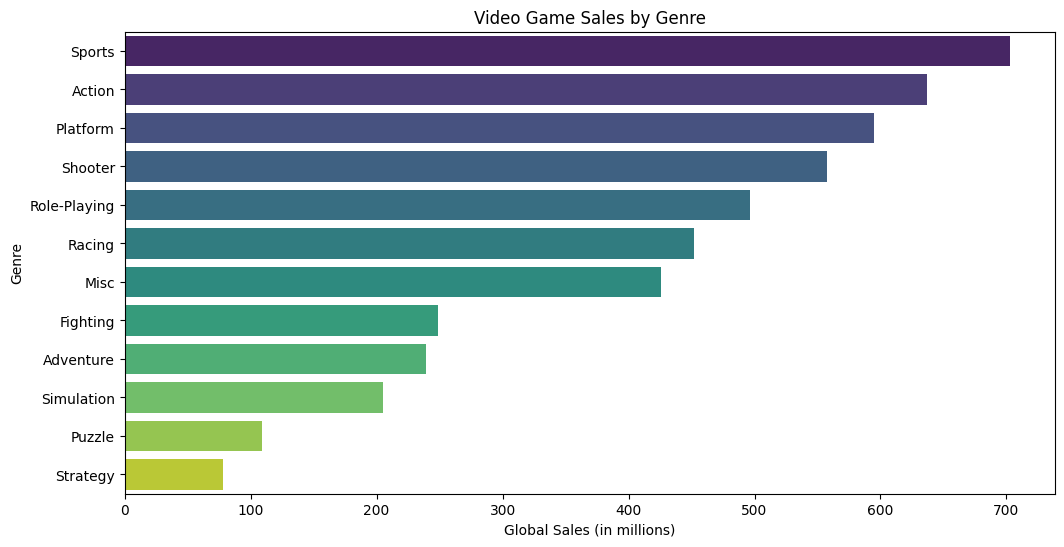

In [22]:
genre_sales = df_train.groupby('Genre')['Global'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Video Game Sales by Genre')
plt.show()


<a name = Section51> </a>
# **Number of Game Releases by Genre**

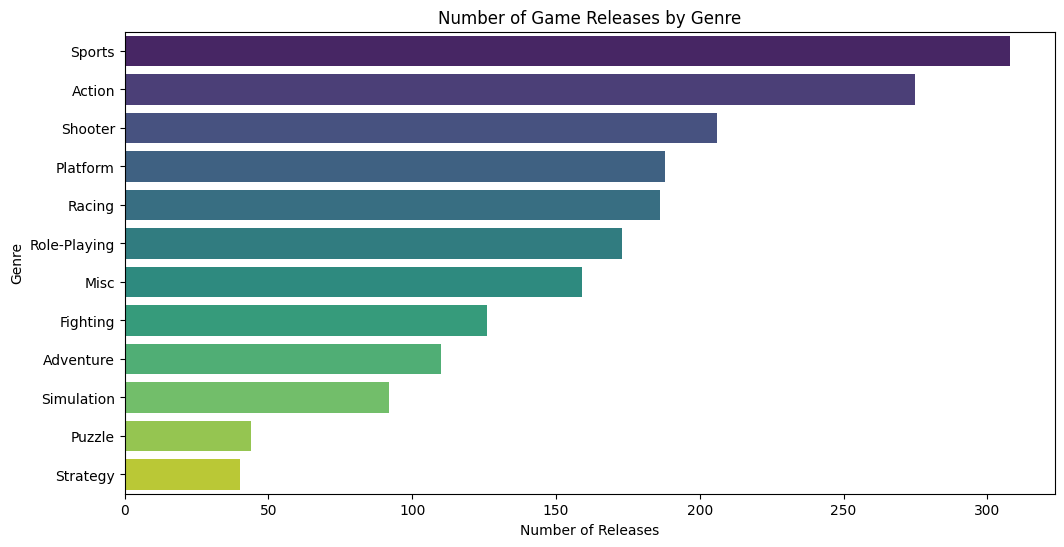

In [24]:
genre_counts = df_train['Genre'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel('Number of Releases')
plt.ylabel('Genre')
plt.title('Number of Game Releases by Genre')
plt.show()


<a name = Section51> </a>
# **Distribution of Sales Revenue by Year**

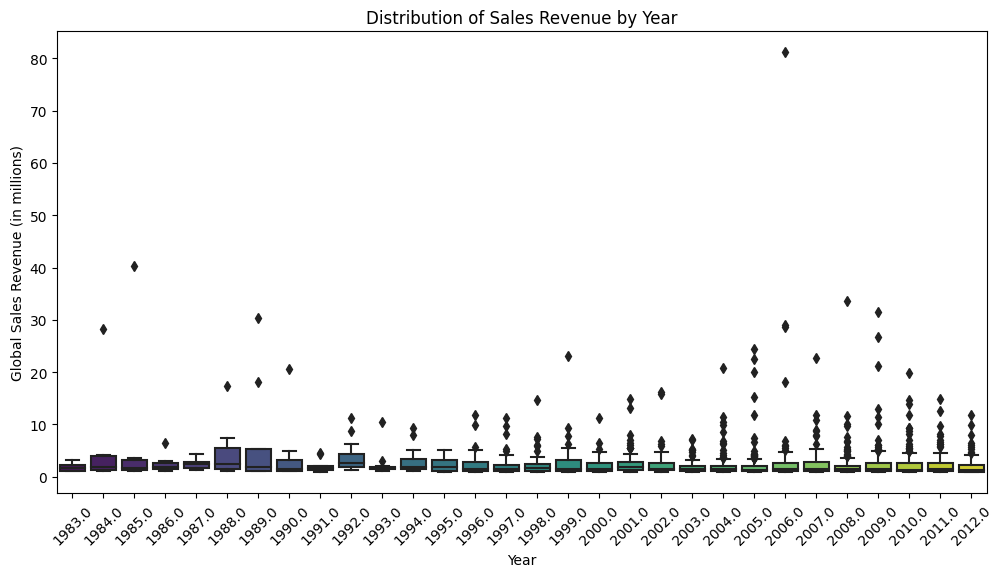

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Global', data=df_train, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Global Sales Revenue (in millions)')
plt.title('Distribution of Sales Revenue by Year')
plt.xticks(rotation=45)
plt.show()

<a name = Section51> </a>
# **Top Gaming Platforms by Global Revenue**

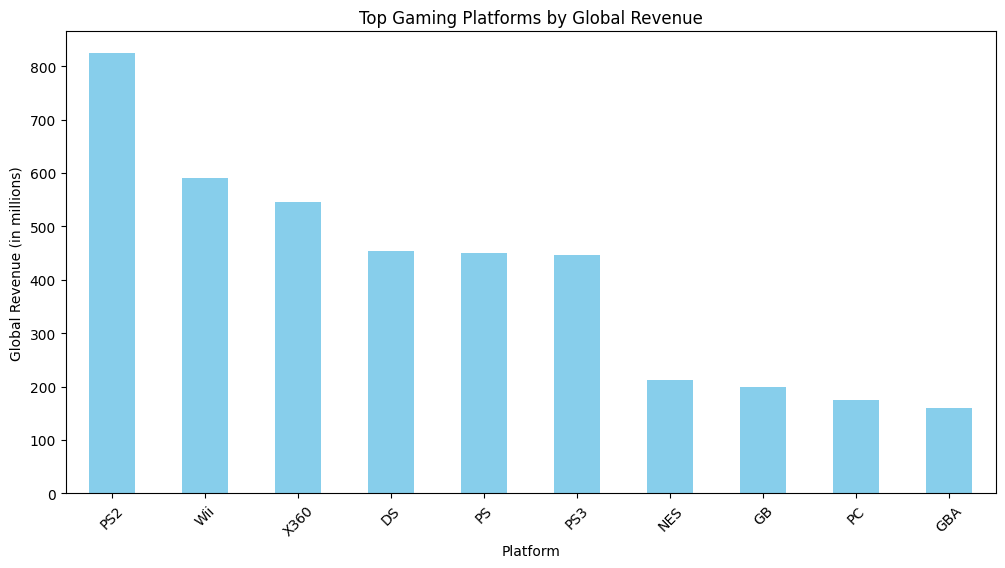

In [28]:
platform_revenue = df_train.groupby('Platform')['Global'].sum()
top_platforms = platform_revenue.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Global Revenue (in millions)')
plt.title('Top Gaming Platforms by Global Revenue')
plt.xticks(rotation=45)
plt.show()

<a name = Section51> </a>
# **Top Publishers by Global Revenue for Each Year**

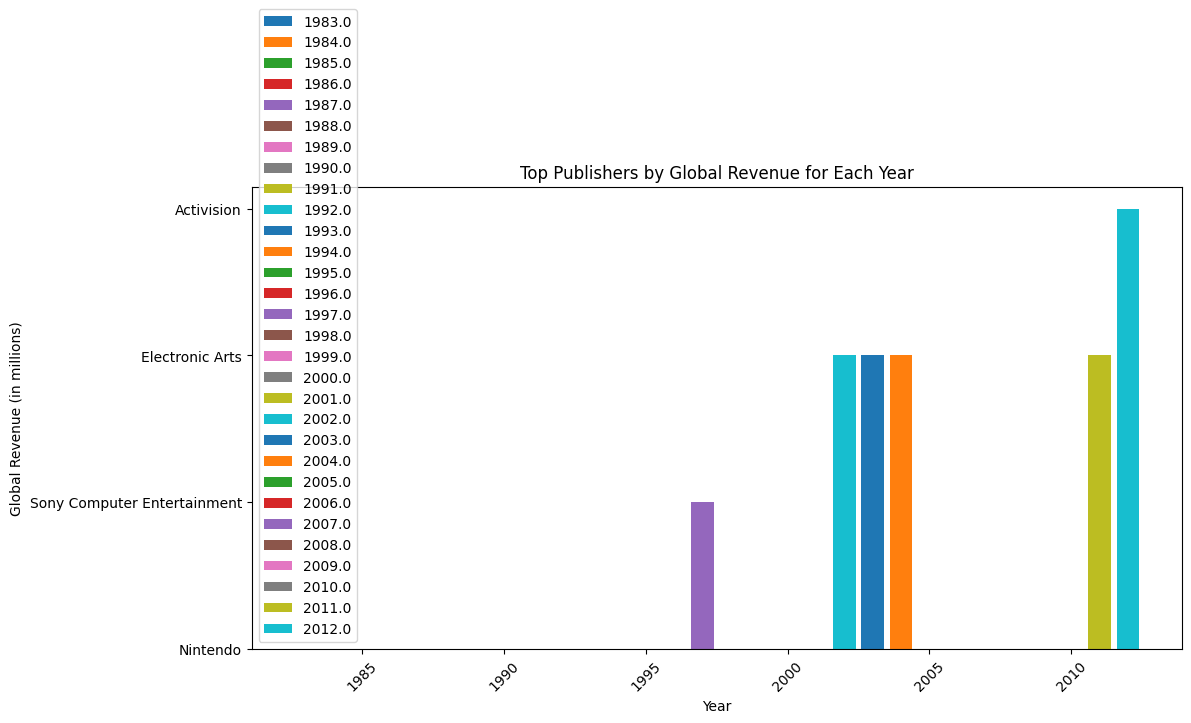

In [17]:

publisher_revenue_by_year = df_train.groupby(['Year', 'Publisher'])['Global'].sum()
def get_top_publisher(year_data):
    return year_data.idxmax()
top_publishers_by_year = publisher_revenue_by_year.groupby('Year').apply(get_top_publisher)
plt.figure(figsize=(12, 6))
for year, publisher in top_publishers_by_year.items():
    plt.bar(year, publisher[1], label=str(year))
plt.xlabel('Year')
plt.ylabel('Global Revenue (in millions)')
plt.title('Top Publishers by Global Revenue for Each Year')
plt.legend()
plt.xticks(rotation=45)  # Rotates the year labels on the x-axis for better readability
plt.show()


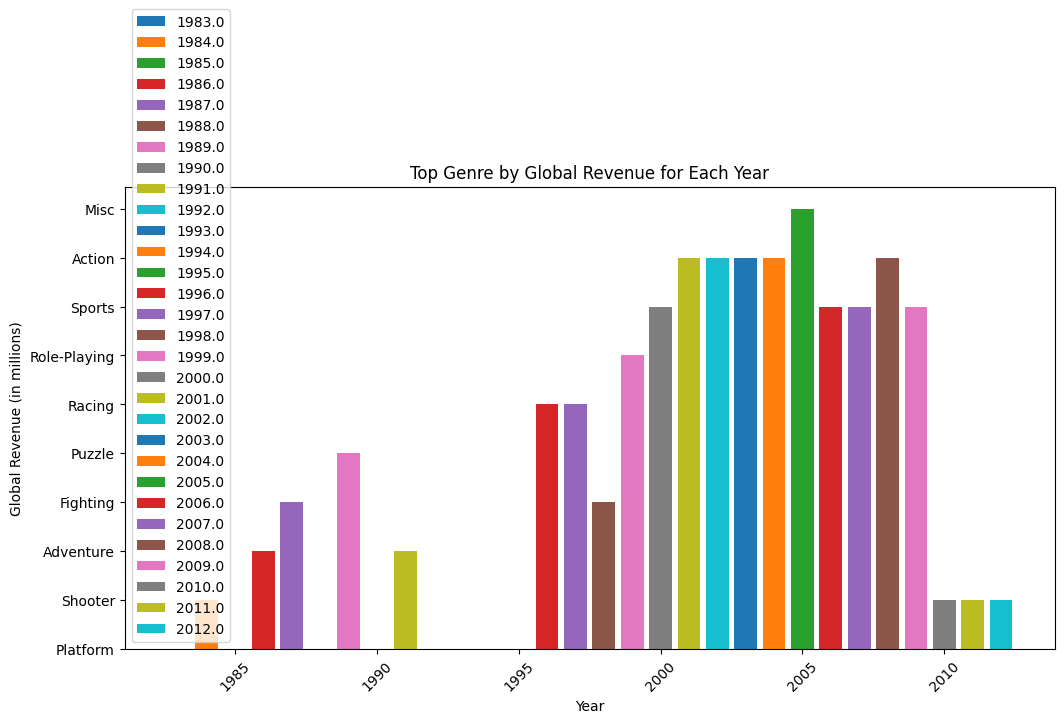

In [19]:
genre_revenue_by_year = df_train.groupby(['Year', 'Genre'])['Global'].sum()
def get_top_genre(year_data):
    return year_data.idxmax()
top_genres_by_year = genre_revenue_by_year.groupby('Year').apply(get_top_genre)
plt.figure(figsize=(12, 6))
for year, genre in top_genres_by_year.items():
    plt.bar(year, genre[1], label=str(year))
plt.xlabel('Year')
plt.ylabel('Global Revenue (in millions)')
plt.title('Top Genre by Global Revenue for Each Year')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<a name = Section51> </a>
# **Global Revenue (in millions)**

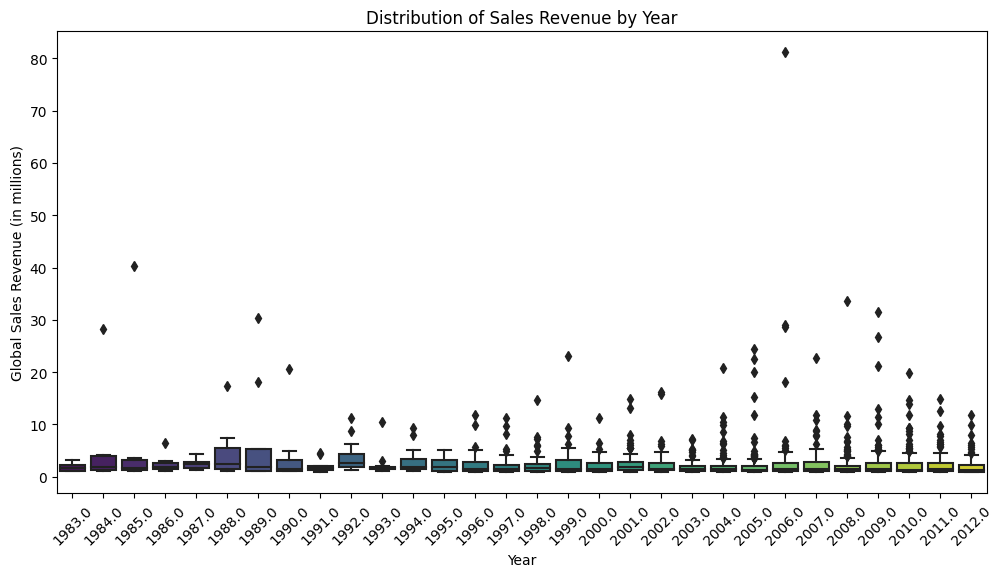

In [25]:
platform_revenue = df_train.groupby('Platform')['Global'].sum()
top_platforms = platform_revenue.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Global Revenue (in millions)')
plt.title('Top Gaming Platforms by Global Revenue')
plt.xticks(rotation=45)
plt.show()

<a name = Section51> </a>
# **Correlation Matrix**

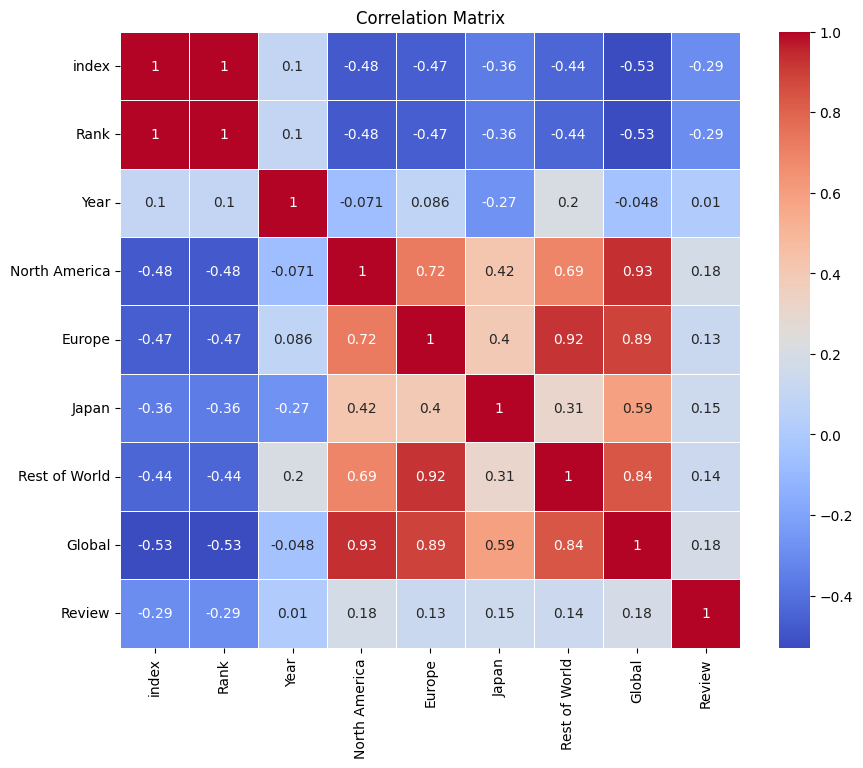

In [29]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<a name = Section51> </a>
# **Key Take aways from the EDA**

In recent years, fewer games have sold over 100,000 copies, and game revenue has been going down for the past 5-6 years. This means fewer games are becoming really popular.

Nintendo is the company that makes the most money from selling games. They're like the top boss in the gaming world when it comes to money.

The most popular type of game is "Action." People really like action-packed games, and they make the most money.

Action games have been the favorite of gamers since 2001. Gamers just can't seem to get enough of them!

PlayStation is the favorite gaming console for most people. It's like the cool kid on the block when it comes to gaming machines.

EA (Electronic Arts) is the company that makes the most games. They're like the busiest bees in the gaming world.

When it comes to making money, games on gaming platforms that are all about playing games (Platform Genre) do the best. They make the most money for each game they release.

The game "Wii Sports" is the top game when it comes to making money. It's like the star player of the gaming world.

Most of the money made from games comes from North America and Europe. These two places together make up 75% of all the money from gaming. They really love their games!


